<a href="https://colab.research.google.com/github/juno2856/deeplearning/blob/master/machine%20learning/6_3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-04-05 00:34:13--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-04-05 00:34:14--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-04-05 00:34:14--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

In [ ]:
fruits_2d.shape

(300, 10000)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows<2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i *10 +j <n:
        axs[i,j].imshow(arr[i*10+j], cmap = 'gray_r')
        axs[i,j].axis('off')
  plt.show()

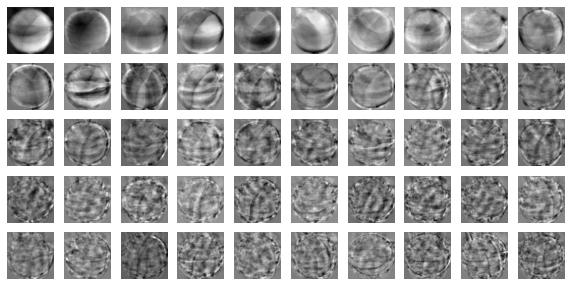

In [ ]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


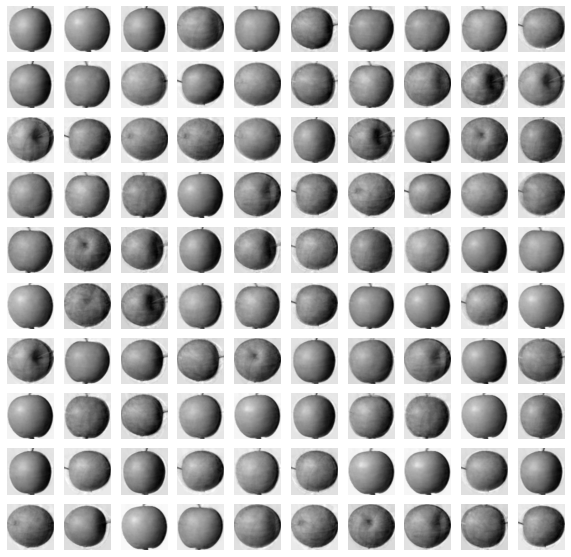

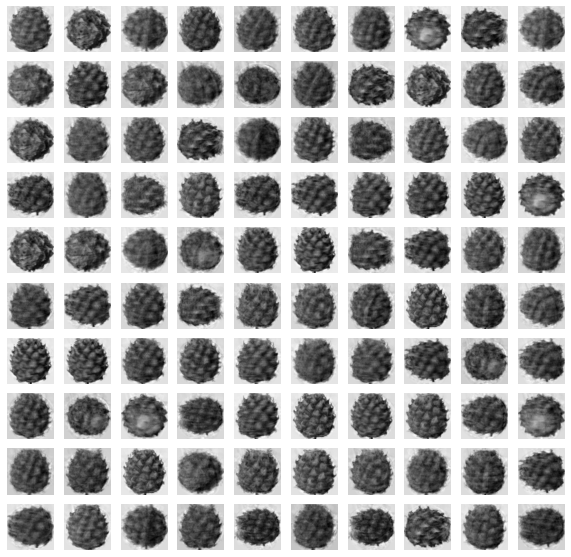

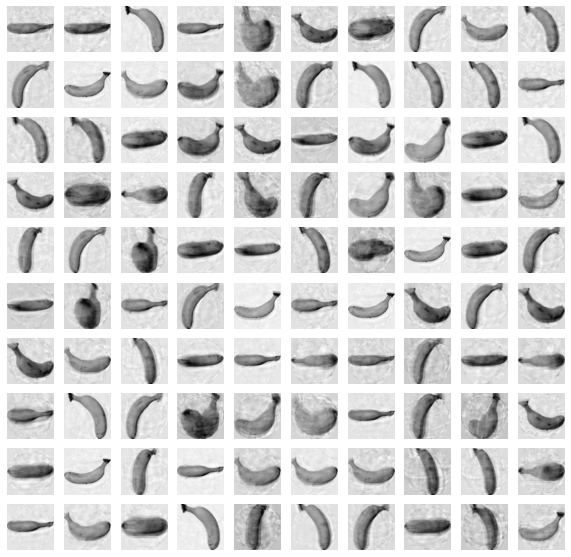

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215174973346851


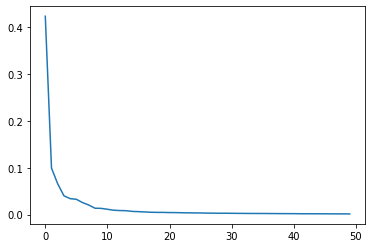

In [ ]:
plt.plot(pca.explained_variance_ratio_)


In [ ]:
print(pca.explained_variance_ratio_)

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578896 0.00511202
 0.00486382 0.00480346 0.00447837 0.00437312 0.00408041 0.00389471
 0.00372429 0.00359278 0.00331433 0.00317829 0.00304313 0.00303661
 0.00288913 0.0027573  0.00264892 0.00255664 0.00252    0.00247391
 0.002393   0.00230802 0.00221729 0.00216409 0.00213579 0.00196213
 0.00192988 0.00190005 0.00185574 0.00182356 0.00172072 0.00168294
 0.00162401 0.00157812]


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0]*100 + [1]*100+[2]*100)

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.6704732418060302


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.06283864974975586


In [ ]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
print(fruits_pca)

[[-2778.41779459 -1571.87380954]
 [-3078.27365136 -2739.27040962]
 [-2620.61072939 -1486.87055253]
 [-3113.71771062 -2530.02283015]
 [-2520.64705144 -2330.64791173]
 [-1556.73860341   123.05166122]
 [-2711.38755162 -1857.35297386]
 [-2884.74283654 -1836.15286362]
 [-2310.99240338 -2660.46264957]
 [-1521.26665012 -2445.37438374]
 [-2486.91643797 -1475.55043726]
 [-2800.83912843 -2001.07115818]
 [-2810.56248913 -2034.36322556]
 [-2209.09841637 -2303.76592225]
 [-2917.38810303 -2438.42530884]
 [-2198.1718942   -636.80184589]
 [-2317.61818126 -2704.80151487]
 [-3289.84664277 -2436.3934378 ]
 [-2641.95018377   503.74908687]
 [-3563.8760831  -1290.01167006]
 [-3708.64597097 -1575.33617706]
 [-2423.96625858 -2080.63343889]
 [-3169.13983546 -2238.74224157]
 [-3059.33441459 -2250.14899831]
 [-2745.8264558  -2276.96357422]
 [-3185.62291444  -958.24335683]
 [-2971.17053083  -250.76949659]
 [-2787.48896668 -2602.75971447]
 [-3498.88592281 -1937.32351269]
 [-3260.68825045  -265.30039087]
 [-2623.54

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9933333333333334
0.09592967033386231


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


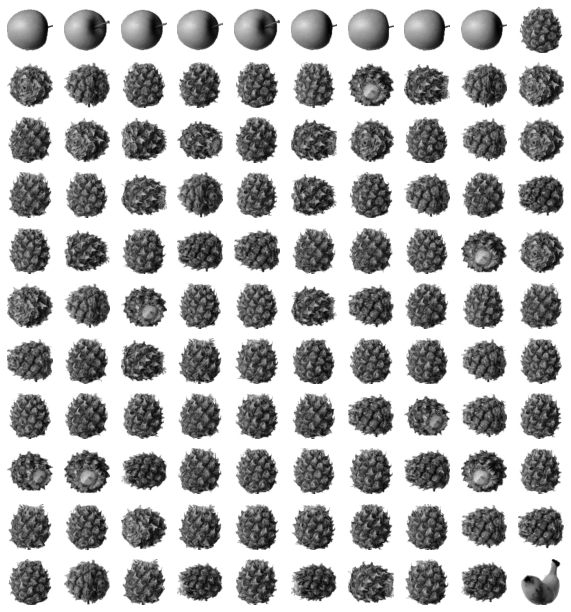

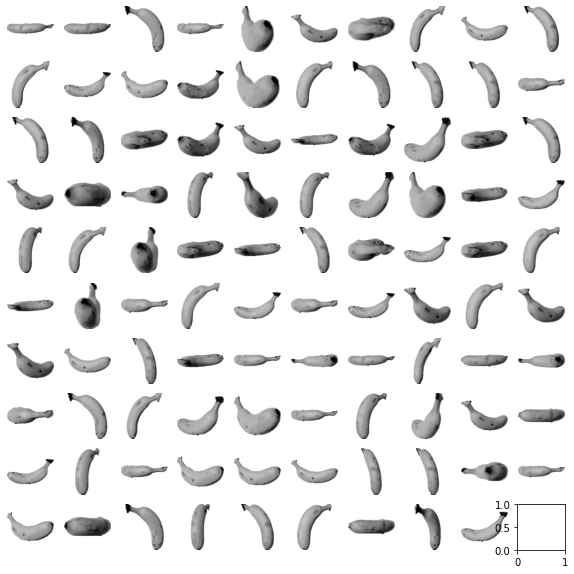

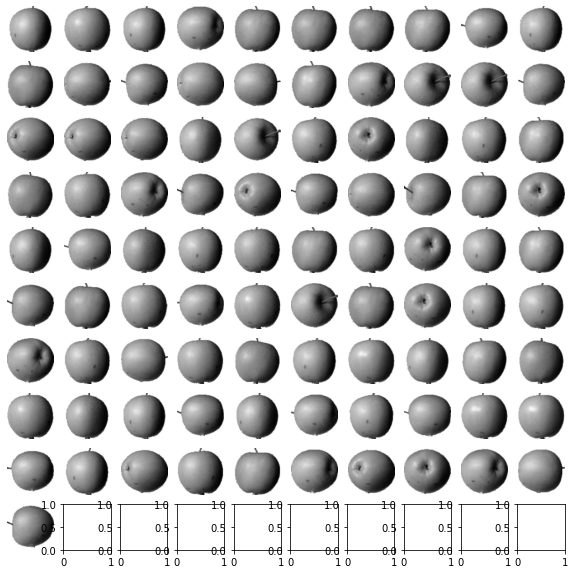

In [ ]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

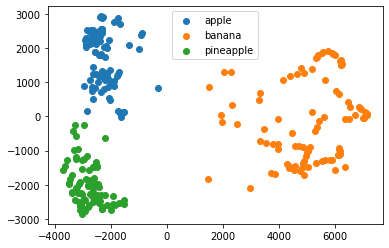

In [ ]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

In [ ]:
print(data)

[[-2778.41779459 -1571.87380954]
 [-3078.27365136 -2739.27040962]
 [-2620.61072939 -1486.87055253]
 [-3113.71771062 -2530.02283015]
 [-2520.64705144 -2330.64791173]
 [-2711.38755162 -1857.35297386]
 [-2884.74283654 -1836.15286362]
 [-2310.99240338 -2660.46264957]
 [-1521.26665012 -2445.37438374]
 [-2486.91643797 -1475.55043726]
 [-2800.83912843 -2001.07115818]
 [-2810.56248913 -2034.36322556]
 [-2209.09841637 -2303.76592225]
 [-2917.38810303 -2438.42530884]
 [-2198.1718942   -636.80184589]
 [-2317.61818126 -2704.80151487]
 [-3289.84664277 -2436.3934378 ]
 [-3563.8760831  -1290.01167006]
 [-3708.64597097 -1575.33617706]
 [-2423.96625858 -2080.63343889]
 [-3169.13983546 -2238.74224157]
 [-3059.33441459 -2250.14899831]
 [-2745.8264558  -2276.96357422]
 [-3185.62291444  -958.24335683]
 [-2971.17053083  -250.76949659]
 [-2787.48896668 -2602.75971447]
 [-3498.88592281 -1937.32351269]
 [-3260.68825045  -265.30039087]
 [-2623.54750342 -2232.78452861]
 [-2307.99121345 -2708.07973757]
 [-3252.36